In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from typing import Optional

"""
Loading the data
"""
pd.options.display.max_colwidth = 1500
pd.options.display.max_rows = 1000

df = pd.read_csv(r'books_and_genres.csv')

# drop the extra index column
df = df.drop(columns=df.columns[0])

df.head(3)

,title,text,genres
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Distributed Proofreaders\n\n\n\n\n SENECA\n\n APOCOLOCYNTOSIS\n\n WITH AN ENGLISH TRANSLATION BY\n\n W.H.D. ROUSE, M.A. LITT. D.\n\n MCMXX\n\n\n\n\n\nINTRODUCTION\n\nThis piece is ascribed to Seneca by ancient tradition; it is impossible\nto prove that it is his, and impossible to prove that it is not. The\nmatter will probably continue to be decided by every one according to his\nview of Seneca's character and abilities: in the matters of style and of\nsentiment much may be said on both sides. Dion Cassius (lx, 35) says that\nSeneca composed an [Greek: apokolokuntosis] or Pumpkinification of\nClaudius after his death, the title being a parody of the usual\n[Greek: apotheosis]; but this title is not given in the MSS. of the Ludus\nde Morte Claudii, nor is there anything in the piece which suits the title\nvery well.\n\nAs a literary form, the piece belongs to the class called\n_Satura Menippea_, a satiric medley in prose and verse.\n\nThis text is that of Buecheler, with a few trifling changes, which are\nindicated in the notes. We have been courteously allowed by Messrs\nWeidmann to use this text. I have to acknowledge the help of Mr Ball's\nnotes, from which I have taken a few references; but my translation was\nmade many years ago.\n\nW.H.D. ROUSE.\n\n\n\n\n\nBIBLIOGRAPHY\n\n_Editio Princeps:_ Lucii Annaei Senecae in morte\n Claudii Caesaris Lud...","{'21st-century', 'history', 'roman', 'classics', 'religion', 'novels', 'philosophy', 'fiction', 'literature', 'short-stories', 'politics', 'non-fiction', 'read-for-school', 'poetry', 'historical', 'humor'}"
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distributed Proofreaders\n\n\n\n\nTHE HOUSE ON THE BORDERLAND\n\nWilliam Hope Hodgson\n\n\n_From the Manuscript discovered in 1877 by Messrs. Tonnison and\nBerreggnog in the Ruins that lie to the South of the Village of\nKraighten, in the West of Ireland. Set out here, with Notes_.\n\n\nTO MY FATHER\n_(Whose feet tread the lost aeons)_\n\nOpen the door,\n And listen!\nOnly the wind's muffled roar,\n And the glisten\nOf tears 'round the moon.\n And, in fancy, the tread\nOf vanishing shoon--\n Out in the night with the Dead.\n\n""Hush! And hark\n To the sorrowful cry\nOf the wind in the dark.\n Hush and hark, without murmur or sigh,\n To shoon that tread the lost aeons:\n To the sound that bids you to die.\nHush and hark! Hush and Hark!""\n _Shoon of the Dead_\n\n\n\n\nAUTHOR'S INTRODUCTION TO THE MANUSCRIPT\n\nMany are the hours in which I have pondered upon the story that is set\nforth in the following pages. I trust that my instincts are not awry\nwhen they prompt me to leave the account, in simplicity, as it was\nhanded to me.\n\nAnd the MS. itself--You must picture me, when first it was given into my\ncare, turning it over, curiously, and making a swift, jerky examination.\nA small book it is; but thick, and all, save the last few pages, filled\nwith a quaint but legible handwriting, and writ very close. I have the\nqueer, faint, pit-water smell of it in my nostrils now as I write, and\nmy f...","{'horror', 'mystery', 'classics', 'science-fiction', 'fantasy', 'novels', 'literature', 'fiction', 'paranormal', '20th-century', 'adult', 'speculative-fiction', 'supernatural', 'dark'}"
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschner\nand the Online Distributed Proofreading Team.\n\n\n\n\nTHE WARRIORS\n\nBY ANNA ROBERTSON BROWN LINDSAY PH.D.\n\nAUTHOR OF\n\nWHAT IS WORTH WHILE?\nCULTURE AND REFORM\nTHE VICTORY OF OUR FAITH\n\n\n\n\nPREFACE\n\nThis work was begun nearly five years ago. Since then, the whole face of\nAmerican history has changed. We have had the Spanish-American War, and\nthe opening-up of our new possessions. In this period of time Gladstone,\nLi Hung Chang, and Queen Victoria have died; there has also occurred the\nassassination of the Empress of Austria and of President McKinley. There\nhas bee

In [3]:
"""
Basic formatting
"""
# stringify all text
df['text'] = df['text'].map(str)
df = df.replace({r'\r\n|\r|\n': ' '}, regex=True)

df.head(3)

,title,text,genres
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Distributed Proofreaders SENECA APOCOLOCYNTOSIS WITH AN ENGLISH TRANSLATION BY W.H.D. ROUSE, M.A. LITT. D. MCMXX INTRODUCTION This piece is ascribed to Seneca by ancient tradition; it is impossible to prove that it is his, and impossible to prove that it is not. The matter will probably continue to be decided by every one according to his view of Seneca's character and abilities: in the matters of style and of sentiment much may be said on both sides. Dion Cassius (lx, 35) says that Seneca composed an [Greek: apokolokuntosis] or Pumpkinification of Claudius after his death, the title being a parody of the usual [Greek: apotheosis]; but this title is not given in the MSS. of the Ludus de Morte Claudii, nor is there anything in the piece which suits the title very well. As a literary form, the piece belongs to the class called _Satura Menippea_, a satiric medley in prose and verse. This text is that of Buecheler, with a few trifling changes, which are indicated in the notes. We have been courteously allowed by Messrs Weidmann to use this text. I have to acknowledge the help of Mr Ball's notes, from which I have taken a few references; but my translation was made many years ago. W.H.D. ROUSE. BIBLIOGRAPHY _Editio Princeps:_ Lucii Annaei Senecae in morte Claudii Caesaris Ludus nuper repertus: Rome, 1513. _Latest critical...","{'21st-century', 'history', 'roman', 'classics', 'religion', 'novels', 'philosophy', 'fiction', 'literature', 'short-stories', 'politics', 'non-fiction', 'read-for-school', 'poetry', 'historical', 'humor'}"
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distributed Proofreaders THE HOUSE ON THE BORDERLAND William Hope Hodgson _From the Manuscript discovered in 1877 by Messrs. Tonnison and Berreggnog in the Ruins that lie to the South of the Village of Kraighten, in the West of Ireland. Set out here, with Notes_. TO MY FATHER _(Whose feet tread the lost aeons)_ Open the door, And listen! Only the wind's muffled roar, And the glisten Of tears 'round the moon. And, in fancy, the tread Of vanishing shoon-- Out in the night with the Dead. ""Hush! And hark To the sorrowful cry Of the wind in the dark. Hush and hark, without murmur or sigh, To shoon that tread the lost aeons: To the sound that bids you to die. Hush and hark! Hush and Hark!"" _Shoon of the Dead_ AUTHOR'S INTRODUCTION TO THE MANUSCRIPT Many are the hours in which I have pondered upon the story that is set forth in the following pages. I trust that my instincts are not awry when they prompt me to leave the account, in simplicity, as it was handed to me. And the MS. itself--You must picture me, when first it was given into my care, turning it over, curiously, and making a swift, jerky examination. A small book it is; but thick, and all, save the last few pages, filled with a quaint but legible handwriting, and writ very close. I have the queer, faint, pit-water smell of it in my nostrils now as I write, and my fingers have subconscious memories of the soft, ""clo...","{'horror', 'mystery', 'classics', 'science-fiction', 'fantasy', 'novels', 'literature', 'fiction', 'paranormal', '20th-century', 'adult', 'speculative-fiction', 'supernatural', 'dark'}"
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschner and the Online Distributed Proofreading Team. THE WARRIORS BY ANNA ROBERTSON BROWN LINDSAY PH.D. AUTHOR OF WHAT IS WORTH WHILE? CULTURE AND REFORM THE VICTORY OF OUR FAITH PREFACE This work was begun nearly five years ago. Since then, the whole face of American history has changed. We have had the Spanish-American War, and the opening-up of our new possessions. In this period of time Gladstone, Li Hung Chang, and Queen Victoria have died; there has also occurred the assassination of the Empress of Austria and of President McKinley. There has been the Chinese persecution, the destruction of Galveston by storm and of Martinique by volcanic 

In [4]:
"""
Methods that will be used in the next block to try to source a published date
"""
import re
import roman
from roman import InvalidRomanNumeralError

# regex for finding Gregorian or Roman publish dates
rn_year_regex = r"\b(.[M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3}))]{3,})\b"
modern_year_regex = r"(\b\d{4}\b)"
valid_year_regex = f"{modern_year_regex}|{rn_year_regex}"

# methods for finding above regex matches in text
find_year = re.compile("(" + rn_year_regex + "|" + modern_year_regex + ")")
find_modern_year = re.compile("(" + modern_year_regex + ")")


def is_right_era(int_date: int):
    return 1000 < int_date < 1922


def get_valid_date(date: str) -> int:
    try:
        int_date = int(date)
    except (ValueError, TypeError):
        return 0

    if is_right_era(int_date):
        return int_date

    return 0


def convert_date(date: str) -> int:
    if date == "no date":
        return 0

    valid_date = get_valid_date(date)
    if valid_date:
        return valid_date

    # If the number cannot be found from the string, maybe it is a roman number
    try:
        number = roman.fromRoman(date.strip())
    except (InvalidRomanNumeralError, TypeError, AttributeError) as e:
        return 0

    valid_date = get_valid_date(number)
    return valid_date

In [5]:


"""
Try to source a published date from the intro text of each book and write to new "year" column
"""

# try to find either a Roman or Gregorian year within the text of each book, and insert into the "year" column
df['year'] = df['text'].map(lambda t: (find_year.search( t[0:1000]) or ["no date"])[0])

# no date before
print(len(df.loc[df['year'] == 'no date']))
df['year'] = df['year'].map(convert_date)

# no date after :(
print(len(df.loc[df['year'] == 0]))



3721
5611


In [6]:
"""
Methods that will be used in the next block to try to source published date from Google Books
"""

import requests
import time

# ADD YOUR GOOGLE BOOKS API CLIENT SECRET HERE IF YOU WOULD LIKE TO RUN THIS PORTION
secret = ""


def is_valid_date(date: str) -> bool:
    if not date.isnumeric():
        return False

    return is_right_era(int(date))

# Try to source the publication date from a single book edition in the payload
def find_publication_year_from_item(item: dict) -> Optional[int]:
    published_date = item["volumeInfo"].get("publishedDate", "")

    if published_date and is_valid_date(published_date):
        return published_date

    # if there is no valid publishedDate, search in the description text of the response
    description = item["volumeInfo"].get("description", "")
    possible_dates = [
        date[0]
        for date in find_modern_year.findall(description)
        if is_valid_date(date[0])
    ]
    if possible_dates:
        return min(possible_dates)


# Check the Google Books API by a book's title in order to get the publication year
def get_publication_year(title: str) -> Optional[int]:
    if not secret:
        print(
            'Please assign value to "secret" variable above with your Google Books API key'
        )
        return

    # avoid per-minute rate limiting
    time.sleep(0.05)
    url = f"https://www.googleapis.com/books/v1/volumes?q={title}&key={secret}"
    response = requests.get(url)

    items = response.json().get("items")
    if not items:
        print("No matches found for ", title, response.json())
        return 0

    possible_years = [
        found
        for item in items
        if (found := find_publication_year_from_item(item)) is not None
    ]

    if possible_years:
        year = min(possible_years)
        print(f"{title}: {year}")
        return year

    print("could not find year for title ", title)
    return 0

In [7]:
"""
Loop over the rows missing a publication year and run the above methods to attempt to fill it.
This needs to be done in batches because of rate limiting.

CSV with saved results imported in file in leui of live fetching. See commented out block below
if you would like to test it (you will need a Google Book API client key)
"""

# If you would like to test this out, uncomment the block below and use your own secret key in the block above
# dfcopy = df.copy()[0:100]
# dfcopy.loc[dfcopy['year'] == 0, 'year'] = dfcopy.loc[dfcopy['year'] == 0]['title'].apply(get_publication_year)

# read from the already compiled set instead of fetching live from Google Books API
dfFull = pd.read_csv("fullset.csv")

# Extra formatting!
# Force the year into an int and the text into a string
dfFull.year = dfFull.year.astype("int")
dfFull["text"] = dfFull["text"].astype(str)

# Drop the "genres" column as we will not use it
dfFull = dfFull.drop("genres", axis=1)
dfFull.head(3)

,title,text,year
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Distributed Proofreaders SENECA APOCOLOCYNTOSIS WITH AN ENGLISH TRANSLATION BY W.H.D. ROUSE, M.A. LITT. D. MCMXX INTRODUCTION This piece is ascribed to Seneca by ancient tradition; it is impossible to prove that it is his, and impossible to prove that it is not. The matter will probably continue to be decided by every one according to his view of Seneca's character and abilities: in the matters of style and of sentiment much may be said on both sides. Dion Cassius (lx, 35) says that Seneca composed an [Greek: apokolokuntosis] or Pumpkinification of Claudius after his death, the title being a parody of the usual [Greek: apotheosis]; but this title is not given in the MSS. of the Ludus de Morte Claudii, nor is there anything in the piece which suits the title very well. As a literary form, the piece belongs to the class called _Satura Menippea_, a satiric medley in prose and verse. This text is that of Buecheler, with a few trifling changes, which are indicated in the notes. We have been courteously allowed by Messrs Weidmann to use this text. I have to acknowledge the help of Mr Ball's notes, from which I have taken a few references; but my translation was made many years ago. W.H.D. ROUSE. BIBLIOGRAPHY _Editio Princeps:_ Lucii Annaei Senecae in morte Claudii Caesaris Ludus nuper repertus: Rome, 1513. _Latest critical...",1920
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distributed Proofreaders THE HOUSE ON THE BORDERLAND William Hope Hodgson _From the Manuscript discovered in 1877 by Messrs. Tonnison and Berreggnog in the Ruins that lie to the South of the Village of Kraighten, in the West of Ireland. Set out here, with Notes_. TO MY FATHER _(Whose feet tread the lost aeons)_ Open the door, And listen! Only the wind's muffled roar, And the glisten Of tears 'round the moon. And, in fancy, the tread Of vanishing shoon-- Out in the night with the Dead. ""Hush! And hark To the sorrowful cry Of the wind in the dark. Hush and hark, without murmur or sigh, To shoon that tread the lost aeons: To the sound that bids you to die. Hush and hark! Hush and Hark!"" _Shoon of the Dead_ AUTHOR'S INTRODUCTION TO THE MANUSCRIPT Many are the hours in which I have pondered upon the story that is set forth in the following pages. I trust that my instincts are not awry when they prompt me to leave the account, in simplicity, as it was handed to me. And the MS. itself--You must picture me, when first it was given into my care, turning it over, curiously, and making a swift, jerky examination. A small book it is; but thick, and all, save the last few pages, filled with a quaint but legible handwriting, and writ very close. I have the queer, faint, pit-water smell of it in my nostrils now as I write, and my fingers have subconscious memories of the soft, ""clo...",1877
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschner and the Online Distributed Proofreading Team. THE WARRIORS BY ANNA ROBERTSON BROWN LINDSAY PH.D. AUTHOR OF WHAT IS WORTH WHILE? CULTURE AND REFORM THE VICTORY OF OUR FAITH PREFACE This work was begun nearly five years ago. Since then, the whole face of American history has changed. We have had the Spanish-American War, and the opening-up of our new possessions. In this period of time Gladstone, Li Hung Chang, and Queen Victoria have died; there has also occurred the assassination of the Empress of Austria and of President McKinley. There has been the Chinese persecution, the destruction of Galveston by storm and of Martinique by volcanic action. Wireless telegraphy has been discovered, and the source of the spread of certain fevers. In this time have been carried on gigantic engineering undertakings,--the Trans-Siberian Railroad, the Trans-Balkan Railroad, the rebuilding of New York. We have also looked upon the consolidation of vast forces of steel, iron, sugar, shipping, and other trusts. We have witnessed an extrao

In [8]:
"""
Helper method to determine whether a certain book has adequately long text
"""
MIN_FULL_TEXT = 15000

def is_acceptable_length(text: str, length: int = MIN_FULL_TEXT):
    if not isinstance(text, str) or len(text) < length:
        return False

    return True

In [9]:
print("Book count before removing undated and outliers: ", len(dfFull))

print("Number of books without dates to be removed: ", len(dfFull.loc[dfFull.year == 0]))
dfFull = dfFull.drop(dfFull[dfFull.year == 0].index)

# drop the books from before 1775 - not enough examples
print("Number of books from before 1775, to be removed: ",len(dfFull.loc[dfFull.year < 1775]))
dfFull = dfFull.drop(dfFull[dfFull.year < 1775].index)

# drop books after 1922 - these are errors
print("Number of books from after 1922, to be removed: ", len(dfFull.loc[dfFull.year > 1922]))
dfFull = dfFull.drop(dfFull[dfFull.year > 1922].index)

# drop any books without text or not enough text
print("Number of books with too short or absent text, to be removed: ", len(dfFull[dfFull.text.apply(is_acceptable_length) == False]))
dfFull = dfFull.drop(dfFull[dfFull.text.apply(is_acceptable_length) == False].index)

print("Dropping duplicates")
dfFull = dfFull.drop_duplicates(subset="title", keep="first")

print("New book count: ", len(dfFull))

dfFull.head()

Book count before removing undated and outliers:  10633
Number of books without dates to be removed:  946
Number of books from before 1775, to be removed:  975
Number of books from after 1922, to be removed:  143
Number of books with too short or absent text, to be removed:  460
Dropping duplicates
New book count:  7279


,title,text,year
0,apocolocyntosis,"Produced by Ted Garvin, Ben Courtney and PG Distributed Proofreaders SENECA APOCOLOCYNTOSIS WITH AN ENGLISH TRANSLATION BY W.H.D. ROUSE, M.A. LITT. D. MCMXX INTRODUCTION This piece is ascribed to Seneca by ancient tradition; it is impossible to prove that it is his, and impossible to prove that it is not. The matter will probably continue to be decided by every one according to his view of Seneca's character and abilities: in the matters of style and of sentiment much may be said on both sides. Dion Cassius (lx, 35) says that Seneca composed an [Greek: apokolokuntosis] or Pumpkinification of Claudius after his death, the title being a parody of the usual [Greek: apotheosis]; but this title is not given in the MSS. of the Ludus de Morte Claudii, nor is there anything in the piece which suits the title very well. As a literary form, the piece belongs to the class called _Satura Menippea_, a satiric medley in prose and verse. This text is that of Buecheler, with a few trifling changes, which are indicated in the notes. We have been courteously allowed by Messrs Weidmann to use this text. I have to acknowledge the help of Mr Ball's notes, from which I have taken a few references; but my translation was made many years ago. W.H.D. ROUSE. BIBLIOGRAPHY _Editio Princeps:_ Lucii Annaei Senecae in morte Claudii Caesaris Ludus nuper repertus: Rome, 1513. _Latest critical...",1920
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distributed Proofreaders THE HOUSE ON THE BORDERLAND William Hope Hodgson _From the Manuscript discovered in 1877 by Messrs. Tonnison and Berreggnog in the Ruins that lie to the South of the Village of Kraighten, in the West of Ireland. Set out here, with Notes_. TO MY FATHER _(Whose feet tread the lost aeons)_ Open the door, And listen! Only the wind's muffled roar, And the glisten Of tears 'round the moon. And, in fancy, the tread Of vanishing shoon-- Out in the night with the Dead. ""Hush! And hark To the sorrowful cry Of the wind in the dark. Hush and hark, without murmur or sigh, To shoon that tread the lost aeons: To the sound that bids you to die. Hush and hark! Hush and Hark!"" _Shoon of the Dead_ AUTHOR'S INTRODUCTION TO THE MANUSCRIPT Many are the hours in which I have pondered upon the story that is set forth in the following pages. I trust that my instincts are not awry when they prompt me to leave the account, in simplicity, as it was handed to me. And the MS. itself--You must picture me, when first it was given into my care, turning it over, curiously, and making a swift, jerky examination. A small book it is; but thick, and all, save the last few pages, filled with a quaint but legible handwriting, and writ very close. I have the queer, faint, pit-water smell of it in my nostrils now as I write, and my fingers have subconscious memories of the soft, ""clo...",1877
3,a voyage to the moon,"Produced by Christine De Ryck, Stig M. Valstad, Suzanne L. Shell and PG Distributed Proofreaders A VOYAGE TO THE MOON: WITH SOME ACCOUNT OF THE MANNERS AND CUSTOMS, SCIENCE AND PHILOSOPHY, OF THE PEOPLE OF MOROSOFIA, AND OTHER LUNARIANS. BY GEORGE TUCKER (JOSEPH ATTERLEY) ""It is the very error of the moon, She comes more near the earth than she was wont, And makes men mad.""--_Othello_. 1827 CONTENTS. CHAPTER I. Atterley's birth and education--He makes a voyage-- Founders off the Burman coast--Adventures in that Empire--Meets with a learned Brahmin from Benares. CHAPTER II. The Brahmin's illness--He reveals an important secret to Atterley--Curious information concerning the Moon--The Glonglims--They plan a voyage to the Moon. CHAPTER III. The Brahmin and Atterley prepare for their voyage-- Description of their travelling machine--Incidents of the voyage--The appearance of the earth; Africa; Greece--The Brahmin's speculations on the different races of men--National character. CHAPTER IV. Continuation of the voyage--View of Europe; Atlantic Ocean; America--Sp

Histogram of the distribution of publication year. Data is heavily skewed towards the later years of the set. The first 75 years of the dataset contains only ~1/3 of the total amount of books, while the last 72 years of the date range of the set contains 2/3rds of the total books. A full 45% of the books are from 1900-1922.

Between 1775-1850 books: 32%
Between 1850-1900 books:23%
Between 1900-1922 books: 45%


Text(0.5, 1.05, 'Distribution of books across year published')

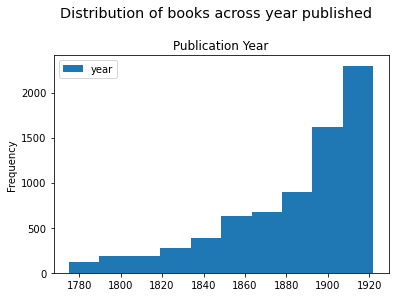

In [10]:
import matplotlib.pyplot as plt

# uncomment this statement to see the count for each year
# print(dfFull['year'].value_counts(ascending=True).sort_index())
print(
    f"Between 1775-1850 books: {round(len(dfFull.loc[dfFull.year < 1875]) / len(dfFull) * 100)}%"
)
print(
    f"Between 1850-1900 books:{round(len(dfFull.loc[(dfFull.year >= 1875) & (dfFull.year < 1900)]) / len(dfFull) * 100)}%"
)
print(
    f"Between 1900-1922 books: {round(len(dfFull.loc[(dfFull.year >= 1900) & (dfFull.year <= 1922)]) / len(dfFull) * 100)}%"
)

dfFull.plot(kind="hist", title="Publication Year")
plt.suptitle(
    "Distribution of books across year published",
    x=0.5,
    y=1.05,
    ha="center",
    fontsize="x-large",
)

In [11]:
"""
Define testing and training books
"""
# testing books are every 5th book for each year according to the original dataset
# or if there are fewer than 5 books, the first book.
testing_books = []
did_it = []

for year in range(1775, 1923):
    books_from_year = list(dfFull[dfFull.year == year].index)
    if len(books_from_year) < 5:
        testing_books.append(books_from_year[0])
    testing_books.extend(books_from_year[::5])  # we want 20% testing dat


def get_is_testing(row):
    if row.name in testing_books:
        did_it.append(row.name)
        row["test"] = True
    else:
        row["test"] = False
    return row


dfFull = dfFull.apply(get_is_testing, axis=1)

To have a more even distribution of the dataset, as well as to have more manageable data points that the text of an entire book, I create 200 data points for each year represented in the set. The 200 points are 5000 character portions of the books attributed to that year. For years with only a few books, the points from that year will have less variety, perhaps yielding worse results than the years with a variety of different books. I do this before tokenizing and other processing the text as the process will be less intense once the texts have been truncated.

In [39]:
"""
Create new dataframe for final data. Each year will have 200 rows, each with a unique portion of text sourced
from a book published in that year
"""

all_years = []
PER_YEAR_COUNT = 200

for year in range(1775, 1923):
    years = [year] * PER_YEAR_COUNT
    all_years.extend(years)

print(len(all_years))
dfPas = pd.DataFrame(columns=["title", "passage", "year", "test"])
dfPas["year"] = all_years
dfPas["index"] = dfPas.index

pd.concat([dfPas.head(2), dfPas.tail(2)])

29600


,title,passage,year,test,index
0,NaN,NaN,1775,NaN,0
1,NaN,NaN,1775,NaN,1
29598,NaN,NaN,1922,NaN,29598
29599,NaN,NaN,1922,NaN,29599


In [40]:
import random
import copy

PASSAGE_LENGTH = 5000

dfFullCopy = dfFull.copy()
no_continue_list = []


def get_full_text(row):
    index = row["index"]
    index_for_year = index % PER_YEAR_COUNT

    books_from_year = list(dfFullCopy[dfFullCopy.year == row["year"]].index)

    # we have exhausted all the text from the books from this year. There are a few "bad" years with only 4 books
    if not len(books_from_year):
        print(f"THERE ARE NO BOOKS LEFT FOR {row.year}. NOT CONTINUING WITH THIS YEAR.")
        raise ValueError("Depleted books")

    index_in_book_list = index_for_year % len(books_from_year)
    book_index = books_from_year[index_in_book_list]

    book = dfFullCopy.loc[book_index]
    is_test = book["test"]
    full_text = copy.copy(book["text"])

    return full_text, book_index, book["title"], is_test


def get_passage(row):
    if row["year"] in no_continue_list:
        return

    try:
        full_text, book_index, book_title, is_test = get_full_text(row)
    except ValueError:
        no_continue_list.append(row["year"])
        return

    # # testing books are every 5th book for each year according to the original dataset
    # # or if there are fewer than 5 books, the first book.
    # books_from_year_original = list(dfFull[dfFull.year == row['year']].index)
    # testing_books = books_from_year_original[::5]
    # row['test'] = book_index == 0 if len(books_from_year_original) < 5 else book_index in testing_books

    # print(f'Creating excerpt for {row.year}: from {book_title}.')

    max_start_point = len(full_text) - PASSAGE_LENGTH
    start_point = random.randint(0, max_start_point)
    end_point = start_point + PASSAGE_LENGTH
    passage = full_text[start_point:end_point]

    if not len(passage) == PASSAGE_LENGTH:
        print(f"SOMETHING WENT WRONG FOR BOOK {book_title}")
        return

    # Remove the used text from the original dataframe if remaining text is less than the passage length, remove the book
    # Otherwise remove the used text from the existing full text and replace the modified text in the original df
    full_text_modified = full_text[:start_point] + full_text[end_point:]
    if len(full_text_modified) < PASSAGE_LENGTH:
        print(f"dropping book: {book_title} at index {book_index} from year {row.year}")
        dfFullCopy.drop([book_index], inplace=True)
    else:
        dfFullCopy.at[book_index, "text"] = full_text_modified
        new_text_length = len(dfFullCopy.loc[book_index]["text"])

        if not new_text_length < len(full_text):
            print(f"SOMETHING WENT WRONG FOR BOOK {book_title}")
            return

    row["passage"] = passage
    row["title"] = book_title
    row["test"] = is_test
    # print(f'Success! {len(row.passage)} char passage created for {book_title}.')

    return row


dfPas = dfPas.apply(get_passage, axis=1)
pd.concat([dfPas.head(2), dfPas.tail(2)])

dropping book: st patricks day at index 10381 from year 1775
dropping book: the duenna at index 10433 from year 1775
dropping book: the passenger at index 7669 from year 1776
dropping book: le nouveau dictionnaire at index 5891 from year 1776
dropping book: prisoners of the revolution at index 9467 from year 1776
dropping book: faithfully yours at index 5408 from year 1777
dropping book: dominica at index 5675 from year 1777
dropping book: aslaugas knight at index 6720 from year 1777
dropping book: proeve van kleine gedigten at index 2602 from year 1778
dropping book: percy at index 7675 from year 1778
dropping book: logbook of timothy boardman at index 5929 from year 1778
dropping book: edouard at index 6189 from year 1778
dropping book: die argonauten at index 8997 from year 1779
dropping book: thankful blossom at index 4368 from year 1779
dropping book: paul jones at index 6877 from year 1779
dropping book: die erziehung des at index 9361 from year 1780
dropping book: the metaphysic

,title,passage,year,test,index
0,thomas jefferson,"nt, later on to become habitable and settled areas, and make a great and important addition to the public domain. In the appointment of the expedition and the interest taken in it, Jefferson showed his intelligent appreciation of what was to become of high value to the country, and ere long result in a land of beautiful homes to future generations of its hardy people. At the close of his second term in the Presidential chair (1809) Jefferson retired once more, and finally, to ""Monticello,"" after over forty years of almost continuous public service. His career in this high office was entirely worthy of the man, being that of an honorable and public-spirited, as well as an able and patriotic, statesman. If not so astute and sagacious as some who have held the presidency, especially in failing to see where his political principles, if carried out to their logical conclusions, would lead, his conscientiousness and liberality of mind prevented him from falling gravely into error or making any very fatal mistakes. Though far from orthodox,--indeed, a freethinker he may be termed, in matters of religious belief, his personal life was most exemplary, and his relations with his fellowmen were ever just, honorable, and upright. He had no gifts as a speaker, but was endowed highly as a writer and thinker; and, generally, was a man of broad intelligence, unusual culture for his time, and possessed a most alert and enlightened mind. His interest in education and the liberal arts was ...",1775.0,True,0.0
1,charles lamb,"of my old friend. The fact that distinguished Charles Lamb from other men was his entire devotion to one grand and tender purpose. There is, probably, a romance involved in every life. In his life it exceeded that of others. In gravity, in acuteness, in his noble battle with a great calamity, it was beyond the rest. Neither pleasure nor toil ever distracted him from his holy purpose. Everything was made subservient to it. He had an insane sister, who, in a moment of uncontrollable madness, had unconsciously destroyed her own mother; and to protect and save this sister--a gentle woman, who had watched like a mother over his own infancy--the whole length of his life was devoted. What he endured, through the space of nearly forty years, from the incessant fear and frequent recurrence of his sister's insanity, can now only be conjectured. In this constant and uncomplaining endurance, and in his steady adherence to a great principle of conduct, his life was heroic. We read of men giving up all their days to a single object--to religion, to vengeance, to some overpowering selfish wish; of daring acts done to avert death or disgrace, or some oppressing misfortune. We read mythical tales of friendship; but we do not recollect any instance in which a great object has been so unremittingly carried out throughout a whole life, in defiance of a thousand difficulties, and of numberless temptations, straining the good resolution to its utmost, except in the case of our poor clerk of ...",1775.0,False,1.0
29598,making the house a home,"n and convenient. To-day the landlord would ask ninety dollars a month for that place and tell you he was losing money at that. With the rent paid, we should have eighty-seven dollars a month left to live on. The grocery bill, at that time, would not run more than twenty dollars a month; telephone, gas, and electric light would not exceed ten dollars a month; the milkman and the paper boy would take but little, and in winter time a ton of coal per month would be sufficient. Oh, we should have plenty of money, and could easily afford to pledge twenty dollars a month to pay for necessary furniture. It will be noticed that into our dreaming came no physician, no dentist, no expenses bobbing up from unexpected sources. Not a single bill collector called at the front door of our dream castle to ask for money which we did not have. If older and wiser heads sugge

Text(0.5, 1.05, 'Distribution of books across year published')

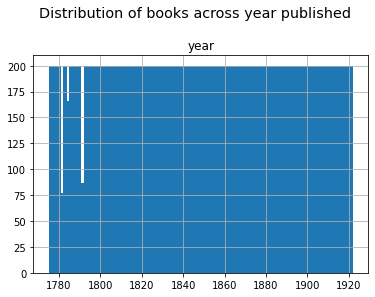

In [41]:
# histogram of datapoint distribution across years
dfPas.hist(column="year", bins=148)
plt.suptitle(
    "Distribution of books across year published",
    x=0.5,
    y=1.05,
    fontsize="x-large",
)

In [42]:
"""
Delete rows without passages (from depleted years)
"""
print("Count before removal ", dfPas.shape[0])
dfPas = dfPas.drop(
    dfPas[dfPas.passage.apply(is_acceptable_length, length=5000) == False].index
)
print("Count after removal ", dfPas.shape[0])

Count before removal  29600
Count after removal  29330


In [43]:
"""
Combine them
"""
dfGrouped = (
    dfPas.groupby(["test"])["test"]
    .count()
    .reset_index(name="Count")
    .sort_values(["Count"], ascending=False)
)

print(dfGrouped.head())

    test  Count
0  False  22775
1   True   6555


In [44]:
from sklearn.utils import shuffle

dfPas = dfPas.copy()
dfPas = dfPas.drop(columns=["index"])
dfPas = shuffle(dfPas, random_state=1)
dfPas = dfPas.reset_index(drop=True)
dfPas.head(3)

,title,passage,year,test
0,the europeans,"Gertrude sat down again on that day, and she sat down on several other days. Felix, while he plied his brush, told her a great many stories, and she listened with charmed avidity. Her eyes rested upon his lips; she was very serious; sometimes, from her air of wondering gravity, he thought she was displeased. But Felix never believed for more than a single moment in any displeasure of his own producing. This would have been fatuity if the optimism it expressed had not been much more a hope than a prejudice. It is beside the matter to say that he had a good conscience; for the best conscience is a sort of self-reproach, and this young man's brilliantly healthy nature spent itself in objective good intentions which were ignorant of any test save exactness in hitting their mark. He told Gertrude how he had walked over France and Italy with a painter's knapsack on his back, paying his way often by knocking off a flattering portrait of his host or hostess. He told her how he had played the violin in a little band of musicians--not of high celebrity--who traveled through foreign lands giving provincial concerts. He told her also how he had been a momentary ornament of a troupe of strolling actors, engaged in the arduous task of interpreting Shakespeare to French and German, Polish and Hungarian audiences. While this periodical recital was going on, Gertrude lived in a fantastic world; she seemed to herself to be reading a romance that came out in daily numbers. She had known ...",1878.0,False
1,afghanistan and the anglorussian dispute,"general, but there would be the reception that any Christian foe would almost certainly meet at the hands of a warlike and powerful people, who can unite with all the cohesion of religious fanaticism, backed up by something like military organization and a perfect acquaintance with the strategical conditions of their country. Most probably there would be no serious local opposition to the occupation by Russia of a line extending from Balkh eastwards through Khulm and Kunduz to Faizabad and Sarhadd, all of which places can be reached without great difficulty from the Oxus, and are connected by excellent lateral road communications. But the occupation of such a line could have but one possible object, which would be to conceal the actual line of further advance. Each of these places may be said to dominate a pass to India over the Hindoo Kush. Opposite Sarhadd is the Baroghil, leading either to Kashmir or to Mastuj and the Kunar valley. Faizabad commands the Nuksa Pass. Khulm looks southwards to Ghozi and the Parwan Pass into Kohistan, while from Balkh two main routes diverge, one to Bamian and Kabul, the other to Maimana and Herat. It would be a great mistake to suppose that this short list disposes of all the practicable passes over the Hindoo Kush. The range is a singularly well-defined one throughout its vast length; but it is not by any means a range of startling peaks and magn...",1838.0,False
2,the piccolomini,"ared not but be silent. And those brilliants, That like a crown of stars enwreathed your brows, They scared me too! O wherefore, wherefore should be At the first meeting spread as 'twere the ban Of excommunication round you,--wherefore Dress up the angel as for sacrifice. And cast upon the light and joyous heart The mournful burden of his station? Fitly May love dare woo for love; but such a splendor Might none but monarchs venture to approach. THEKLA. Hush! not a word more of this mummery; You see how soon the burden is thrown off. [To the COUNTESS. He is not in spirits. Wherefore is he not? 'Tis you, aunt, that have made him all so gloomy! He had quite another nature on the journey-- So calm, so bright, so joyous eloquent. [To MAX. It was my wish to see you always so, And never otherwise! MAX. You find yourself In your great father's arms, beloved lady! All in a new world, which does homage to you, And which, were't only by its novelty, Delights y

In [45]:
dfTest = dfPas[dfPas["test"] == True].drop(columns=["test"]).reset_index(drop=True)
dfTrain = dfPas[dfPas["test"] == False].drop(columns=["test"]).reset_index(drop=True)
print("Training count: ", dfTrain.shape[0])
print("Testing count: ", dfTest.shape[0])

test_books = set(dfTest["title"].values.tolist())
train_books = set(dfTrain["title"].values.tolist())
books_in_common = [book for book in test_books if book in train_books]

print("Number of books in commong between the sets: ", len(books_in_common))

# dfTest.to_csv('testing.csv', index=False)
# dfTrain.to_csv('training.csv', index=False)

print(dfTest.head(2))

Training count:  22775
Testing count:  6555
Number of books in commong between the sets:  0
                      title  \
0  on the origin of species   
1                  ferragus   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

All of the years are evenly distributed, except for three years that had very sparse data - less than four books each. 1781 only has 77 instances, 1791 only 87 instances, and 1784 has 166. This may yield less exact results for these years. In general, pre-1825 results will be worse than post-1825 as the amount of books available is relatively low for these years, meaning that there is less variety of examples of each year's text.

We have manually separate the training and testing data in the methods above rather than using a library. This is because we do not want to train the model to fit a specific book, but rather a specific year, therefor we must ensure that each book is either exclusively in the testing set or in the training set. The split comes to roughly 27% testing and 63% training

In [46]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing

MAX_WORDS = 10000

x_test = dfTest["passage"]
y_test = dfTest["year"]

x_train = dfTrain["passage"]
y_train = dfTrain["year"]

# Create a tokenizer to feed to the embedding layer
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [47]:
import numpy as np

MAX_LENGTH = 700

vocab_size = len(tokenizer.word_index)
print(vocab_size)

# Padding to make all batches has equal length
x_train = pad_sequences(x_train, padding="post", maxlen=MAX_LENGTH)
x_test = pad_sequences(x_test, padding="post", maxlen=MAX_LENGTH)


# Get word to vev from pretrained glove embeddings
embeddings_dictionary = dict()
glove_file = open("glove.6B/glove.6B.100d.txt", encoding="utf8")

for line in glove_file:
    values = line.split()
    word = values[0]
    vector_dimensions = np.asarray(values[1:], dtype="float32")
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()
print(f"Found {len(embeddings_dictionary)} word vectors")

415648
Found 400001 word vectors


In [48]:
# If glove embeddings has an embedding for word in our tokenizer, add it to embedding matrix
EMBEDDING_DIMENSION = 100
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIMENSION))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index - 1] = embedding_vector

In [49]:
"""
Try as regression
"""
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIMENSION, input_length=MAX_LENGTH))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(1))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

model.compile(optimizer=Adam(learning_rate=0.1), loss="mean_squared_error")

history = model.fit(
    x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test)
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          41564800  
                                                                 
 flatten (Flatten)           (None, 70000)             0         
                                                                 
 dense (Dense)               (None, 512)               35840512  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 77,536,897
Trainable params: 35,972,097
Non-trainable params: 41,564,800
_________________________________________________________________
Epoch 1/10


2022-08-27 18:29:54.293194: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


178/178 [==============================] - 22s 123ms/step - loss: 2443744000.0000 - val_loss: 4818.6509
Epoch 2/10
178/178 [==============================] - 20s 113ms/step - loss: 995882.1875 - val_loss: 4913.7075
Epoch 3/10
178/178 [==============================] - 21s 116ms/step - loss: 1896.6239 - val_loss: 1862.4919
Epoch 4/10
178/178 [==============================] - 22s 123ms/step - loss: 1787.5537 - val_loss: 1872.8790
Epoch 5/10
178/178 [==============================] - 21s 117ms/step - loss: 1786.7002 - val_loss: 1876.1746
Epoch 6/10
178/178 [==============================] - 21s 121ms/step - loss: 1787.2330 - val_loss: 1874.7585
Epoch 7/10
178/178 [==============================] - 22s 121ms/step - loss: 1787.9222 - val_loss: 1866.5321
Epoch 8/10
178/178 [==============================] - 22s 121ms/step - loss: 1787.8312 - val_loss: 1873.1965
Epoch 9/10
178/178 [==============================] - 22s 123ms/step - loss: 1788.9674 - val_loss: 1888.8071
Epoch 10/10
178/178 [=

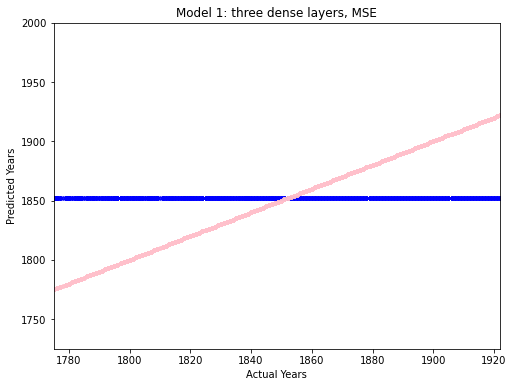

In [51]:
import tensorflow

def get_predictions(current_model: tensorflow.keras.Model, test_x):
    test_array = np.array(test_x)
    return current_model.predict(test_array)


def create_scatterplot(test_x, test_y, current_model: tensorflow.keras.Model, title: str, category=False):
    predictions = get_predictions(current_model, test_x)
    plt.rcParams["figure.figsize"] = [8, 6]
    plt.axis([1775, 1922, 1725, 2000])
    plt.scatter(x=test_y, y=predictions, color="blue", alpha=0.2, s=10)
    plt.scatter(x=test_y, y=test_y, color="pink", alpha=0.2, s=10)
    plt.title(title)
    plt.xlabel("Actual Years")
    plt.ylabel("Predicted Years")
    plt.show()


create_scatterplot(x_test, y_test, model, "Model 1: three dense layers, MSE")

In [52]:
from sklearn import metrics


def get_MSE_and_MAE(current_model: tensorflow.keras.Model, test_x):
    predictions = get_predictions(current_model, test_x)
    print(
        "Mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test, predictions))
    )
    print(
        "Mean absolute error: ",
        np.sqrt(metrics.mean_absolute_error(y_test, predictions)),
    )


get_MSE_and_MAE(model, x_test)

Mean squared error:  43.53233764909073
Mean absolute error:  6.139058309150538


205/205 [==============================] - 5s 24ms/step - loss: 1895.0652
Test Score: 1895.065185546875


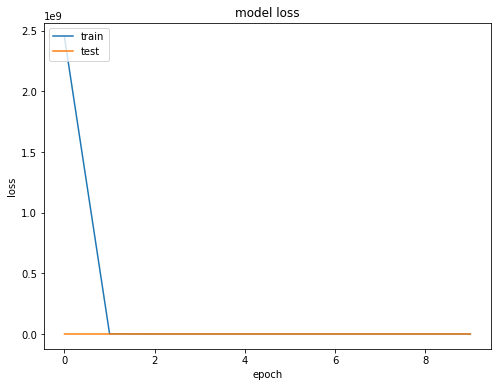

In [54]:
def plot_loss(score: float):
    print("Test Score:", score)

    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])

    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()


plot_loss(model.evaluate(x_test, y_test, verbose=1))

In [55]:
"""
Try same params but with mean absolute error loss function
"""
model2 = Sequential()
model2.add(Embedding(vocab_size, EMBEDDING_DIMENSION, input_length=MAX_LENGTH))
model2.add(Flatten())
model2.add(Dense(512, activation="relu"))
model2.add(Dense(256, activation="relu"))
model2.add(Dense(1))
model2.layers[0].set_weights([embedding_matrix])
model2.layers[0].trainable = False
model2.summary()

model2.compile(optimizer=Adam(learning_rate=0.1), loss="mean_absolute_error")

history = model2.fit(
    x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test)
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 700, 100)          41564800  
                                                                 
 flatten_1 (Flatten)         (None, 70000)             0         
                                                                 
 dense_3 (Dense)             (None, 512)               35840512  
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 77,536,897
Trainable params: 35,972,097
Non-trainable params: 41,564,800
_________________________________________________________________
Epoch 1/10
178/178 [=============

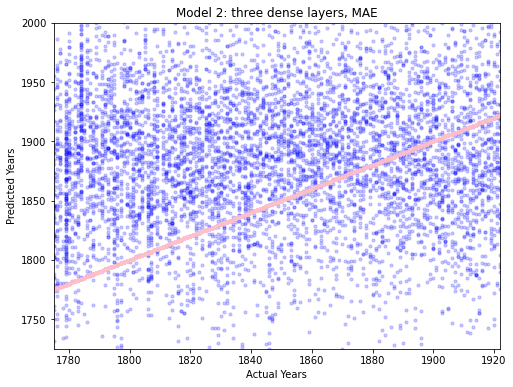

In [56]:
create_scatterplot(x_test, y_test, model2, "Model 2: three dense layers, MAE")

In [57]:
get_MSE_and_MAE(model2, x_test)

Mean squared error:  84.64383845663014
Mean absolute error:  8.267167371964451


In [58]:
from keras.layers import SimpleRNN

"""
Using SIMPLE RNN
"""
model3 = Sequential()
model3.add(
    Embedding(
        vocab_size,
        EMBEDDING_DIMENSION,
        weights=[embedding_matrix],
        input_length=MAX_LENGTH,
    )
)
model3.add(SimpleRNN(units=32))
model3.add(Dense(512, activation="relu"))
model3.add(Dense(256, activation="relu"))
model3.add(Dense(1))
model3.layers[0].trainable = False
model3.summary()
model3.compile(loss="mean_absolute_error", optimizer="adam")

history = model3.fit(
    x_train, y_train, epochs=12, batch_size=64, validation_data=(x_test, y_test)
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 700, 100)          41564800  
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                4256      
                                                                 
 dense_6 (Dense)             (None, 512)               16896     
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 41,717,537
Trainable params: 152,737
Non-trainable params: 41,564,800
_________________________________________________________________
Epoch 1/12
356/356 [================

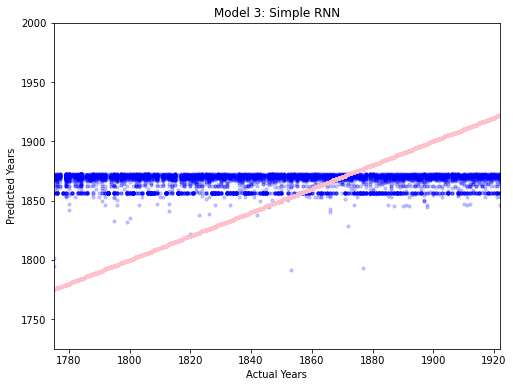

In [60]:
create_scatterplot(x_test, y_test, model3, "Model 3: Simple RNN")

In [61]:
get_MSE_and_MAE(model3, x_test)

Mean squared error:  48.36783058182553
Mean absolute error:  6.39465102189202


205/205 [==============================] - 3s 14ms/step - loss: 40.8916
Test Score: 40.891563415527344


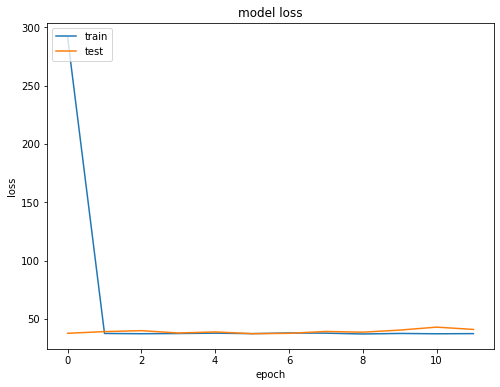

In [62]:
plot_loss(model3.evaluate(x_test, y_test, verbose=1))

In [63]:
from keras.layers import LSTM

"""
Using LSTM - (reads from both sides)
"""
model4 = Sequential()
model4.add(
    Embedding(
        vocab_size,
        EMBEDDING_DIMENSION,
        weights=[embedding_matrix],
        input_length=MAX_LENGTH,
    )
)
model4.add(LSTM(units=32))
model4.add(Dense(512, activation="relu"))
model4.add(Dense(256, activation="relu"))
model4.add(Dense(128, activation="relu"))
model4.add(Dense(1))
model4.layers[0].trainable = False
model4.summary()
model4.compile(loss="mean_absolute_error", optimizer="adam")

history = model4.fit(
    x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test)
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 700, 100)          41564800  
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense_9 (Dense)             (None, 512)               16896     
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 41,763,073
Trainable params: 198,273
Non

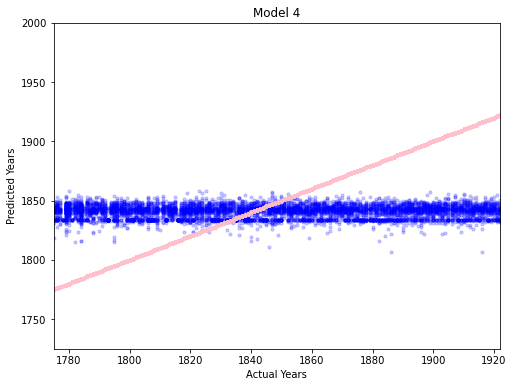

In [64]:
create_scatterplot(x_test, y_test, model4, "Model 4")

In [65]:
"""
Separate data into eras
"""

def write_era(row):
    if row["year"] < 1820:
        row["era"] = 1
    elif 1820 <= row["year"] < 1870:
        row["era"] = 2
    elif row["year"] >= 1870:
        row["era"] = 3
    return row


dfTest2 = dfTest.copy()
dfTrain2 = dfTrain.copy()
dfTest2 = dfTest2.apply(write_era, axis=1)
dfTrain2 = dfTrain2.apply(write_era, axis=1)

dfTest2.head(2)

,title,passage,year,era
0,on the origin of species,"inquiry respecting the causes of the phenomena of organic nature resolves itself into two problems--the first being the question of the origination of living or organic beings; and the second being the totally distinct problem of the modification and perpetuation of organic beings when they have already come into existence. The first question Mr. Darwin does not touch; he does not deal with it at all; but he says--given the origin of organic matter--supposing its creation to have already taken place, my object is to show in consequence of what laws and what demonstrable properties of organic matter, and of its environments, such states of organic nature as those with which we are acquainted must have come about. This, you will observe, is a perfectly legitimate proposition; every person has a right to define the limits of the inquiry which he sets before himself; and yet it is a most singular thing that in all the multifarious, and, not unfrequently, ignorant attacks which have been made upon the 'Origin of Species', there is nothing which has been more speciously criticised than this particular limitation. If people have nothing else to urge against the book, they say--""Well, after all, you see, Mr. Darwin's explanation of the 'Origin of Species' is not good for much, because, in the long run, he admits that he does not know how organic matter began to exist. But if you admit any special creation for the first particle of organic matter you may just as well admit it for...",1831.0,2
1,ferragus,"obtaining either the vengeance or the knowledge which would punish or reward such cares, such efforts, such wiles. But he had not yet reached that impatience which wrings our very entrails and makes us sweat; he roamed in hope, believing that Madame Jules would only refrain for a few days from revisiting the place where she knew she had been detected. He devoted the first days therefore, to a careful study of the secrets of the street. A novice at such work, he dared not question either the porter or the shoemaker of the house to which Madame Jules had gone; but he managed to obtain a post of observation in a house directly opposite to the mysterious apartment. He studied the ground, trying to reconcile the conflicting demands of prudence, impatience, love, and secrecy. Early in the month of March, while busy with plans by which he expected to strike a decisive blow, he left his post about four in the afternoon, after one of those patient watches from which he had learned nothing. He was on his way to his own house whither a matter relating to his military service called him, when he was overtaken in the rue Coquilliere by one of those heavy showers which instantly flood the gutters, while each drop of rain rings loudly in the puddles of the roadway. A pedestrian under these circumstances is forced to stop short and take refuge in a shop or cafe if he is rich enough to pay for the forced hospitality, or, if in poorer circumstances, under a _porte-cochere_, that haven of ...",1820.0,2


Text(0.5, 1.05, 'Distribution of books across published year groupings')

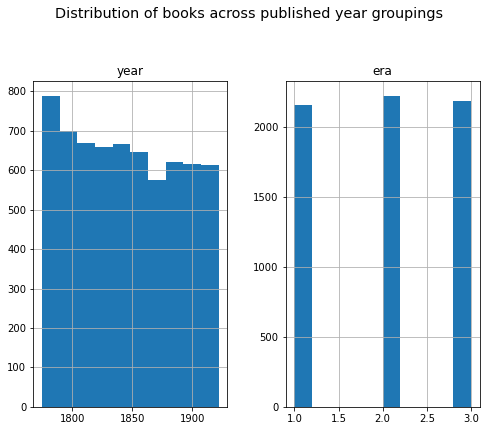

In [67]:
dfTest2.hist()
plt.suptitle(
    "Distribution of books across published year groupings",
    x=0.5,
    y=1.05,
    fontsize="x-large",
)

In [71]:
"""
Create test and train data for passages over eras
"""
x_test_era = dfTest2["passage"]
y_test_era = dfTest2["era"]

x_train_era = dfTrain2["passage"]
y_train_era = dfTrain2["era"]

# Get labels and make them suitable for training. [1,2,3] -> [0,1,2]
label_encoder = preprocessing.LabelEncoder()
y_test_era = label_encoder.fit_transform(y_test_era)
y_train_era = label_encoder.fit_transform(y_train_era)

# One hot encode the labels
y_train_era = tensorflow.keras.utils.to_categorical(y_train_era)
y_test_era = tensorflow.keras.utils.to_categorical(y_test_era)

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(x_train_era)

x_train_era = tokenizer.texts_to_sequences(x_train_era)
x_test_era = tokenizer.texts_to_sequences(x_test_era)

In [72]:
import numpy as np
"""
Create glove embeddings
"""
vocab_size = len(tokenizer.word_index)

x_train_era = pad_sequences(x_train_era, padding="post", maxlen=MAX_LENGTH)
x_test_era = pad_sequences(x_test_era, padding="post", maxlen=MAX_LENGTH)

embeddings_dictionary = dict()
glove_file = open("glove.6B/glove.6B.100d.txt", encoding="utf8")

for line in glove_file:
    values = line.split()
    word = values[0]
    vector_dimensions = np.asarray(values[1:], dtype="float32")
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()
print(f"Found {len(embeddings_dictionary)} word vectors")

Found 400001 word vectors


In [73]:
EMBEDDING_DIMENSION = 100
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIMENSION))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index - 1] = embedding_vector

In [89]:
"""
First try of classification model with LSTM
"""

model5 = Sequential()
model5.add(
    Embedding(
        vocab_size,
        EMBEDDING_DIMENSION,
        weights=[embedding_matrix],
        input_length=MAX_LENGTH,
    )
)
model5.add(LSTM(128, return_sequences=True))
model5.add(LSTM(32))
model5.add(Dense(3, activation="softmax"))
model5.layers[0].trainable = False
model5.summary()

model5.compile(
    optimizer=Adam(learning_rate=0.01), metrics=["acc"], loss="categorical_crossentropy"
)

history = model5.fit(
    x_train_era,
    y_train_era,
    batch_size=128,
    epochs=7,
    verbose=1,
    validation_data=(x_test_era, y_test_era),
)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 700, 100)          41564800  
                                                                 
 lstm_12 (LSTM)              (None, 700, 128)          117248    
                                                                 
 lstm_13 (LSTM)              (None, 32)                20608     
                                                                 
 dense_22 (Dense)            (None, 3)                 99        
                                                                 
Total params: 41,702,755
Trainable params: 137,955
Non-trainable params: 41,564,800
_________________________________________________________________
Epoch 1/7
178/178 [==============================] - 235s 1s/step - loss: 1.0999 - acc: 0.3640 - val_loss: 1.1051 - val_acc: 0.3327
Epoch 2/7
178/178 [================

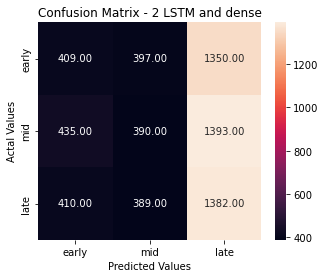

accuracy:  [0.18970315 0.17583408 0.63365429]
early mid late


In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def get_y_pred(current_model):
    return current_model.predict(x_test_era)

def plot_heatmap_and_calculate_accuracy(current_model, title):
    confusion_matrix = get_confusion_matrix(current_model)
    plot_heatmap(confusion_matrix, title)
    get_accuracy(confusion_matrix)

def plot_heatmap(confusion_matrix, title):
    cm_df = pd.DataFrame(
        confusion_matrix,
        index=["early", "mid", "late"],
        columns=["early", "mid", "late"],
    )
    
    # Plotting the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_df, fmt=".2f", annot=True)
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel("Actal Values")
    plt.xlabel("Predicted Values")
    plt.show()

def get_confusion_matrix(current_model):
    y_prediction = get_y_pred(current_model)
    rounded_y = np.argmax(y_test_era, axis=1)
    rounded_predictions = np.argmax(y_prediction, axis=1)

    # Create the confusion matrix
    return metrics.confusion_matrix(rounded_y, rounded_predictions)
   
def get_accuracy(confusion_matrix):
    cm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
    print('accuracy: ', cm.diagonal())
    print('early', 'mid', 'late')

plot_heatmap_and_calculate_accuracy(model5, '2 LSTM and dense')

In [91]:
"""
Model with only one LSTM layer and one dense layer
"""
model6 = Sequential()
model6.add(
    Embedding(
        vocab_size,
        EMBEDDING_DIMENSION,
        weights=[embedding_matrix],
        input_length=MAX_LENGTH,
    )
)
model6.add(LSTM(32))
model6.add(Dense(3, activation="softmax"))
model6.add(Flatten())
model6.layers[0].trainable = False
model6.summary()

model6.compile(
    optimizer=Adam(learning_rate=0.01), metrics=["acc"], loss="categorical_crossentropy"
)

history = model6.fit(
    x_train_era,
    y_train_era,
    batch_size=32,
    epochs=10,
    verbose=1,
    validation_data=(x_test_era, y_test_era),
)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 700, 100)          41564800  
                                                                 
 lstm_14 (LSTM)              (None, 32)                17024     
                                                                 
 dense_23 (Dense)            (None, 3)                 99        
                                                                 
 flatten_6 (Flatten)         (None, 3)                 0         
                                                                 
Total params: 41,581,923
Trainable params: 17,123
Non-trainable params: 41,564,800
_________________________________________________________________
Epoch 1/10
712/712 [==============================] - 85s 118ms/step - loss: 1.0960 - acc: 0.3644 - val_loss: 1.1035 - val_acc: 0.3376
Epoch 2/10
712/712 [=============

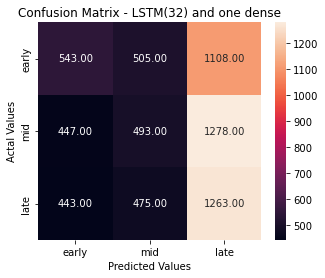

accuracy:  [0.25185529 0.22227232 0.57909216]
early mid late


In [118]:
plot_heatmap_and_calculate_accuracy(model6, 'LSTM(32) and one dense')

In [97]:
model7 = Sequential()
model7.add(
    Embedding(
        vocab_size,
        EMBEDDING_DIMENSION,
        weights=[embedding_matrix],
        input_length=MAX_LENGTH,
    )
)
model7.add(LSTM(256))
model7.add(Dense(3, activation="softmax"))
model7.add(Flatten())
model7.layers[0].trainable = False
model7.summary()

model7.compile(
    optimizer=Adam(learning_rate=0.01), metrics=["acc"], loss="categorical_crossentropy"
)

history = model7.fit(
    x_train_era,
    y_train_era,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(x_test_era, y_test_era),
)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 700, 100)          41564800  
                                                                 
 lstm_17 (LSTM)              (None, 256)               365568    
                                                                 
 dense_26 (Dense)            (None, 3)                 771       
                                                                 
 flatten_9 (Flatten)         (None, 3)                 0         
                                                                 
Total params: 41,931,139
Trainable params: 366,339
Non-trainable params: 41,564,800
_________________________________________________________________
Epoch 1/10
89/89 [==============================] - 239s 3s/step - loss: 1.1612 - acc: 0.3617 - val_loss: 1.1122 - val_acc: 0.3324
Epoch 2/10
89/89 [==================

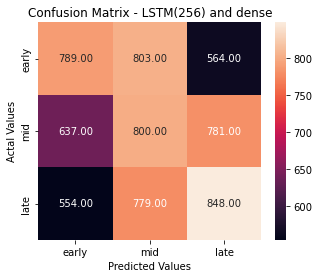

accuracy:  [0.36595547 0.3606853  0.38881247]
early mid late


In [119]:
plot_heatmap_and_calculate_accuracy(model7, 'LSTM(256) and dense')